#Loading Datasets

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import  cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

#Classification Task


1. Load the dataset into a DataFrame object using the Pandas library.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Description of Dataset

In [49]:
data = pd.read_csv('/content/drive/MyDrive/Concepts and Tech. of AI/Assessment/banana_quality.csv')
df = pd.DataFrame(data)
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good



Selection of Dataset :

The loaded dataset is of Banana Quality that aligns with the UNSDG Goal 12: Responsible Consumption and Production.

a) When and by whom was the dataset created?
- This dataset was created by l3LlFF who is an dataset expert. However a precise information on the creater and his background can not be analyzed properly.  

b) How did you access the dataset?
- I accessed this dataset from Kaggle, world's largest data science community and a platform for data science competitions, resources and tools.

c) How does it align with the chosen UNSDG?
- This dataset is of Banana Quality that aligns with the UNSDG Goal 12: Responsible Consumption and Production.

d) List all the attributes (columns) present in the dataset.
- Size - size of banana
- Weight - weight of banana
- Sweetness - sweetness of banana
- Softness - softness of banana
- HarvestTime - amount of time passed from harvesting of the banana
- Ripeness - ripness of banana
- Acidity - acidity of banana
- Quality - quality of banana


 Identify potential questions that the dataset could help answer.
 - Can we classify the quality of a fruit as "Good" or "Bad" based on features like size, sweetness,harvest time and ripeness?

In [50]:
df.shape

(8000, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [52]:
df.isnull().sum()

,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


In [53]:
df.duplicated().sum()

0

- In this dataset there are no missing values.So no data furhter data preprocessing is required to make the dataset suitable for analysis.
- Dataset has enough data to compute for the model meaning sufficent features and their no of data for training and testing.

In [54]:
df.isna()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False


##Summary Statistics

In [55]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


##Data Preprocessing

In [56]:
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
# Convert quality "Good" to 1 and "Bad" to 0
label_encoder = LabelEncoder()
df["Quality"] = label_encoder.fit_transform(df["Quality"])

# Verifying encoding
# print(df["Quality"].unique())  # Output should be [0, 1]

X = df[features].values
y = df['Quality'].values

##Conducting Exploratory Data Analysis (EDA):

**Univariate Analysis**

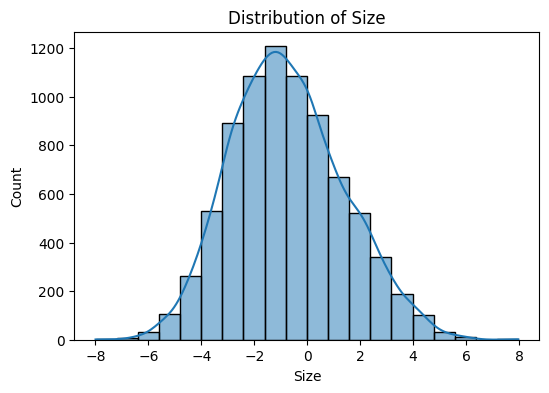

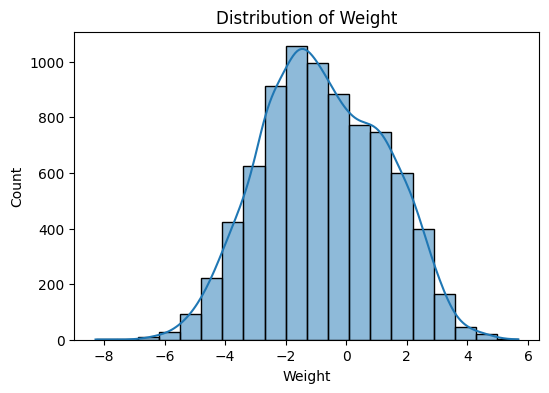

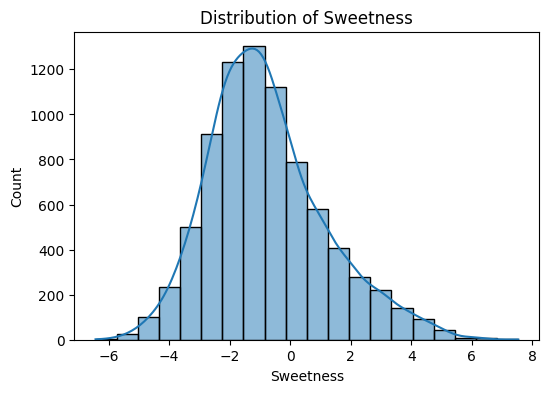

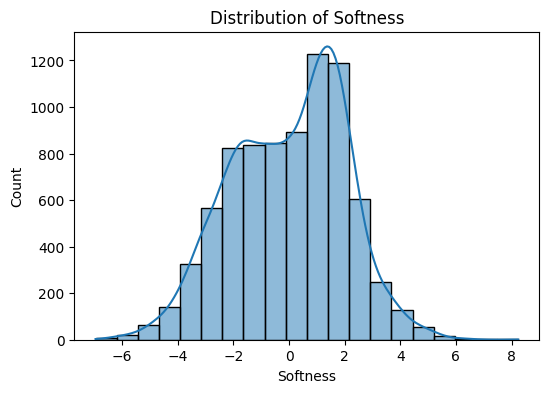

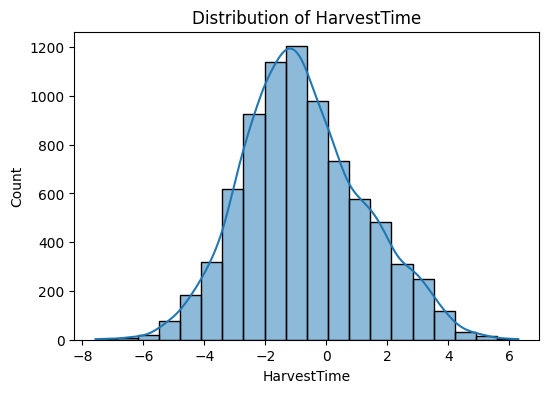

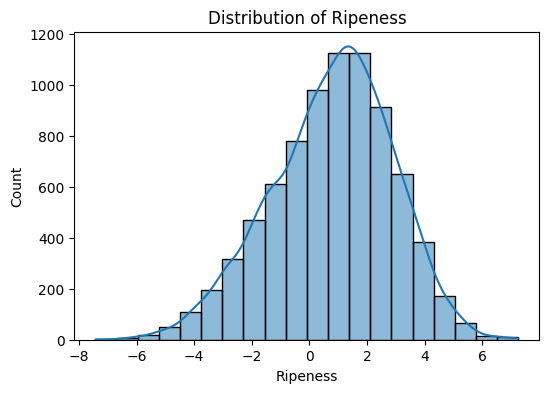

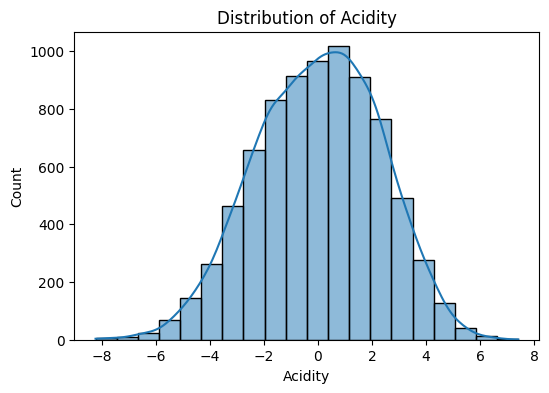

In [57]:
#plotting the distribution of each feature, categorized by 'Quality' status
columns = df.columns.drop('Quality')
for col in columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data = df, x = col, kde = True, bins = 20)
  plt.title(f'Distribution of {col}')
  plt.show()

- The above histograms show the skewness of the features.Most features are concentrated to the centre,ie. at 0 indicating normal distribution excpet for softness feature that shows slight right skewness that shows more banana have lower softness values.  

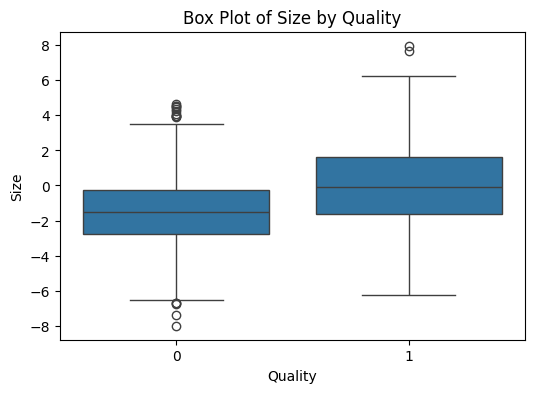

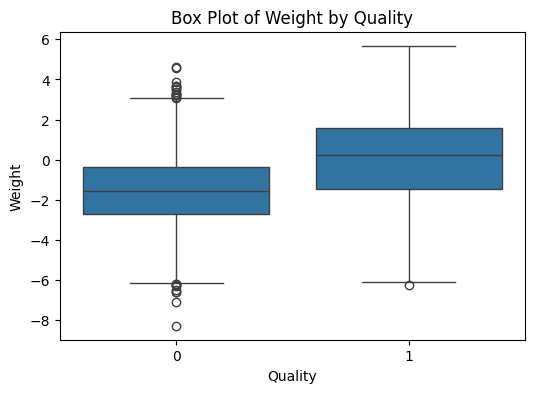

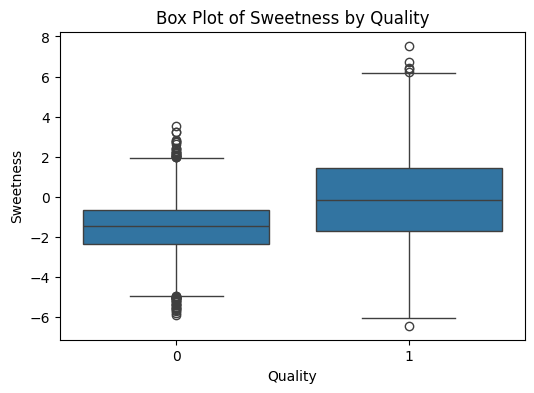

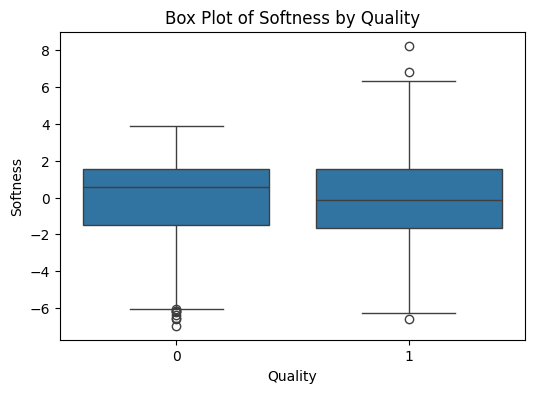

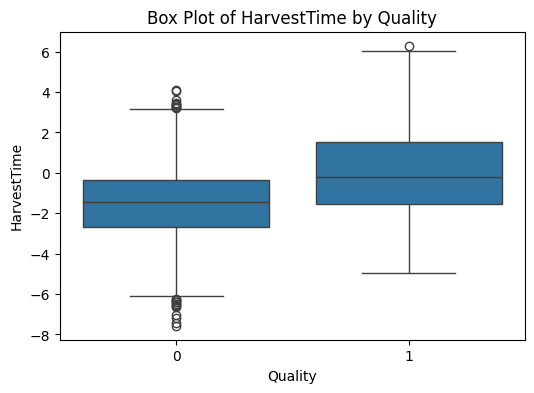

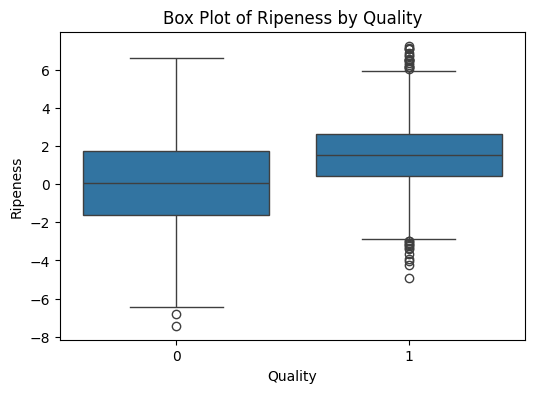

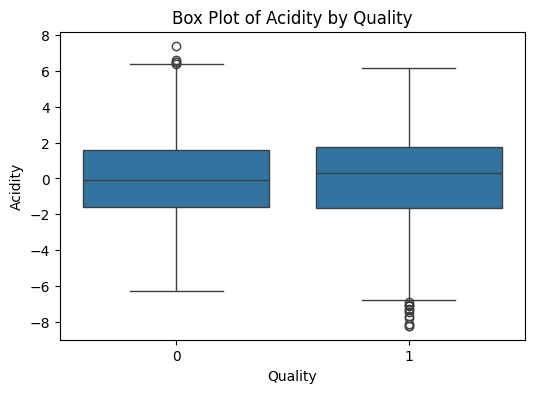

In [58]:
for col in columns:
  plt.figure(figsize = (6,4))
  sns.boxplot(data=df, x='Quality', y=col)
  plt.title(f'Box Plot of {col} by Quality')
  plt.show()

- The above box plots visualize the spread, central tendency, and presence of outliers of features of a dataset. Features like Softness, Ripeness, and Acidity have many extreme outliers at both ends.Sweetness and HarvestTime also show some negative outliers, meaning a few bananas have very low values.

**Bivaraiate Analysis**

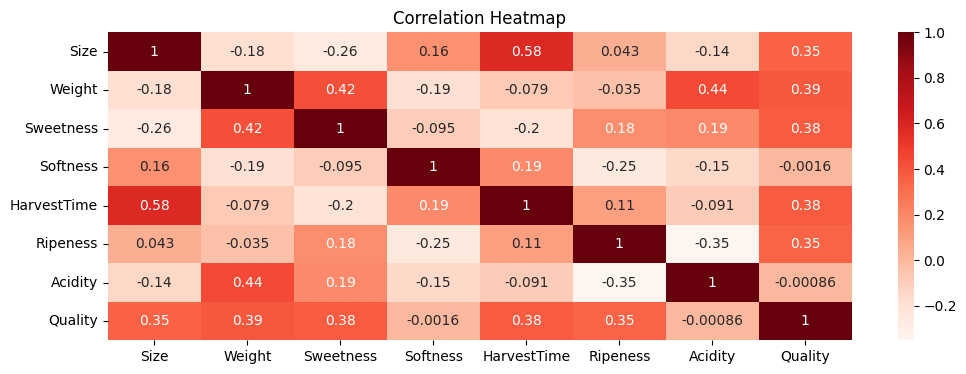

In [59]:
# #creating heatmap to visualize the correlation matrix of the features in the dataset
plt.figure(figsize=(12, 4))
sns.heatmap(df.corr(), annot = True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

- The heatmap shows key relationships between the banana quality and various features. Size, weight, sweetness, and ripeness show a positive correlation with quality, indicating that bananas of their higher value tend to be of higher quality. Additionally, weight and sweetness are moderately correlated, meaning heavier bananas are generally sweeter. In contrast, acidity and softness have little to no impact on quality, as their correlations are close to zero.

** Note:**


Here ouliers are detected but these outliers are not removed because removing the outliers end up making the dataset way too small which doesn't satisfy the data enough for training and testing split. Also,from the visual representation, most of the data that are outliers don't lie far from the whisekers in box model which gives an oppportunity to not remove them.

##Building a model from Scratch

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

In [63]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  y = 1 / (1 + np.exp(-x)) #sigmoid function
  return y


In [64]:
def log_loss(y_true, y_pred):
    """
    Computes the log loss function.

    Args:
        y_true (float): True class label (0 or 1).
        y_pred (float): Predicted probability (between 0 and 1).

    Returns:
        float: Log loss value.
    """
    # Prevent log(0) errors by clipping values
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [65]:
# Cost function - using vectorization
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec =  - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.mean(loss_vec)
    return cost

In [66]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred =  1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost

In [67]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b
    error = y_pred - y
    # Compute gradients
    grad_w = np.dot(X.T, error) / n
    # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(error) / n
    # Gradient w.r.t bias, scalar

    return grad_w, grad_b


def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -=  alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

In [68]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [69]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall =  TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score =  (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [70]:
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)



Training Logistic Regression Model:
Iteration 0: Cost = 0.676293
Iteration 100: Cost = 0.337374
Iteration 200: Cost = 0.306302
Iteration 300: Cost = 0.296204
Iteration 400: Cost = 0.291758
Iteration 500: Cost = 0.289506
Iteration 600: Cost = 0.288271
Iteration 700: Cost = 0.287557
Iteration 800: Cost = 0.287130
Iteration 900: Cost = 0.286869
Iteration 999: Cost = 0.286706


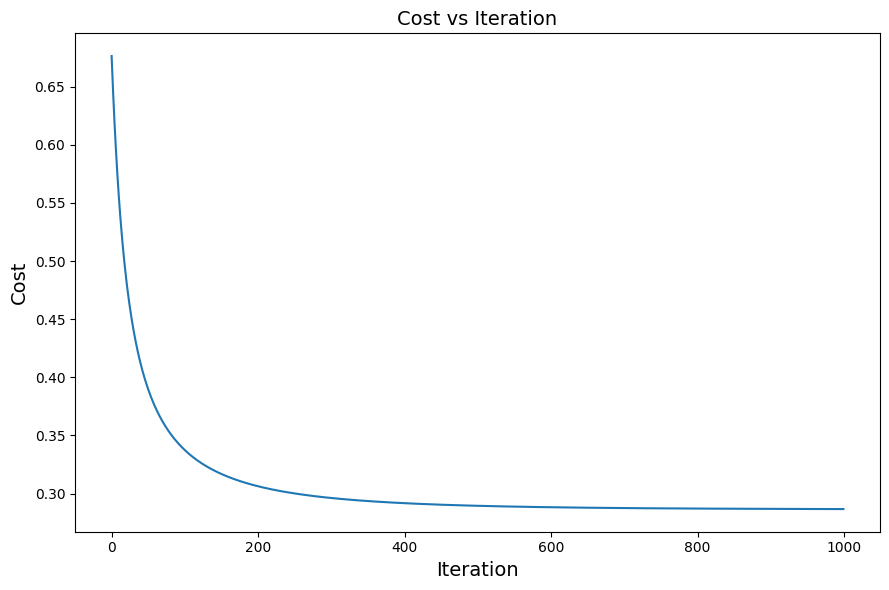

In [71]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [72]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

In [73]:
 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.2867
Test Loss (Cost): 0.3005


Since the test loss is slightly higher than the train loss, it suggests that the model is generalizing reasonably well, with minimal overfitting.

In [74]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 87.06%

Confusion Matrix:
[[677 122]
 [ 85 716]]
Precision: 0.85
Recall: 0.89
F1-Score: 0.87


The model build from scratch had an overall test accuracy of 87.06%, which is pretty good. In the confusion matrix, there are 677 true negatives, 716 true positives, 122 false positives, and 85 false negatives. Precision is 0.85, which means 85% of the predicted positives were actual positives, and recall is 0.89, which means 89% of the actual positives were correctly identified. The F1-score of 0.87 balances precision and recall, confirming a well-performing model in terms of a good trade-off between false positives and false negatives.

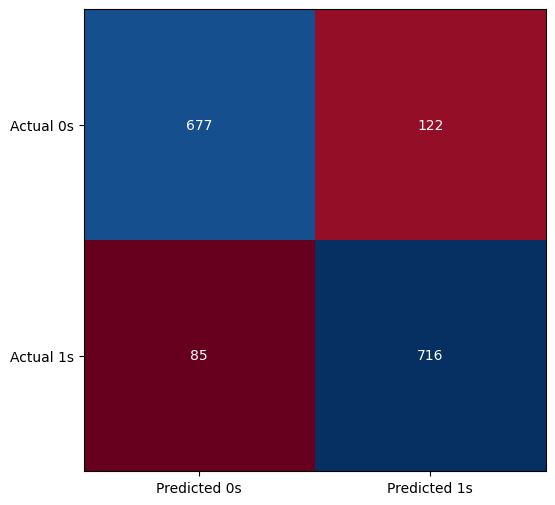

In [75]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(confusion_matrix, cmap='RdBu')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

##Building a Primary Model

In [76]:
# Define features (X) and targets (y)
X = df.drop(columns=["Quality"])
y = df["Quality"]

# Spliting the  data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Standardize features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

**Logistic Regression Model**

In [78]:

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg.predict(X_test_class)

log_reg_acc = accuracy_score(y_test_class, y_pred_log_reg)
print("Logistic Regression (Model 1) Accuracy:", log_reg_acc)
print("\nLogistic Regression  Report:\n", classification_report(y_test_class, y_pred_log_reg))


Logistic Regression (Model 1) Accuracy: 0.879375

Logistic Regression  Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       781
           1       0.88      0.89      0.88       819

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



**Decision Tree Model**

In [79]:
# Train Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_class, y_train_class)
y_pred_tree = tree_clf.predict(X_test_class)

# Evaluate models
tree_acc = accuracy_score(y_test_class, y_pred_tree)

print("Decision Tree (Model 2) Accuracy:", tree_acc)
print("\nDecision Tree Report:\n", classification_report(y_test_class, y_pred_tree))

Decision Tree (Model 2) Accuracy: 0.93875

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       781
           1       0.94      0.95      0.94       819

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



The Decision Tree outperforms Logistic Regression on this dataset, since Decision Tree has 93.88% accuracy , while Logistic Regression has 87.94% accuracy but before fully trusting it, we should tune hyperparameters to control overfitting and improve generalization.

##Hyper-Parameter Tuning Using Grid Search

**Tuning on Logistic Regression Model**

In [80]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimizers that support l1 and l2
}

# Perform GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


- C=0.1 means Stronger regularization (prevents overfitting).
- penalty='l1' → Lasso regularization (removes unnecessary features).
- solver='saga' → Efficient optimization for large datasets with L1 regularization.

**Tuning on Decision Tree Model**

In [81]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],       # Limit tree depth
    'min_samples_split': [2, 5, 10],     # Minimum samples needed to split
    'min_samples_leaf': [1, 2, 5],       # Minimum samples per leaf
    'criterion': ['gini', 'entropy']     # Splitting strategy
}

# Create GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_class, y_train_class)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


- criterion='entropy' (Splitting Strategy)
This tells the Decision Tree how to decide where to split the data at each node. It uses information gain to split.
- max_depth=10	It limits tree depth to 10 to prevent overfitting
min_samples_leaf=1	Allows single samples in leaf nodes
- min_samples_split=2	It allows splitting with just 2 samples	to ensure that tree finds fine-grained patterns

##Feature Selection

**Feature Selection on Logistic Regression Model**

In [82]:
# Check the best hyperparameters returned by GridSearchCV
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, C=best_params.get('C', 1),
                             penalty=best_params.get('penalty', 'l2'),
                             solver=best_params.get('solver', 'liblinear'))

# Initialize RFE with the model and the number of features to select (e.g., select 5 features)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_class, y_train_class)

X_train_class = pd.DataFrame(X_train, columns = X.columns)
X_test_class = pd.DataFrame(X_test, columns=X.columns)

# Get selected features
selected_features = X_train_class.columns[rfe.support_]
print("Selected Features:", selected_features)


Best Hyperparameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Selected Features: Index(['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness'], dtype='object')


**Feature Selection on Decision Tree Model**

In [83]:
# Use the best hyperparameters from grid search
best_params = grid_search.best_params_

# Initialize the Decision Tree model with the best parameters
tree_clf = DecisionTreeClassifier(random_state=42,
                                  max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  criterion=best_params['criterion'])

# Initialize RFE with the Decision Tree model and number of features to select
rfe = RFE(tree_clf, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train_class, y_train_class)

# Get the selected features based on RFE
selected_features = X_train_class.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Size', 'Weight', 'Softness', 'Ripeness', 'Acidity'], dtype='object')


## Final Model

**Loistic regression Final Model**

In [84]:
# Rebuild Logistic Regression model using best hyperparameters
best_log_reg_params = grid_search.best_params_

log_reg_final = LogisticRegression(max_iter=1000,
                                   C=best_log_reg_params.get('C', 1),
                                   penalty=best_log_reg_params.get('penalty', 'l2'),
                                   solver=best_log_reg_params.get('solver', 'liblinear'))

# Train on selected features
log_reg_final.fit(X_train_class[selected_features], y_train_class)

# Make predictions
y_pred_log_reg = log_reg_final.predict(X_test_class[selected_features])

# Evaluate the model
log_reg_acc = accuracy_score(y_test_class, y_pred_log_reg)
print("Logistic Regression Final Model Accuracy:", log_reg_acc)
print("\nLogistic Regression Final Model Report:\n", classification_report(y_test_class, y_pred_log_reg))


Logistic Regression Final Model Accuracy: 0.481875

Logistic Regression Final Model Report:
               precision    recall  f1-score   support

           0       0.47      0.52      0.50       781
           1       0.49      0.44      0.47       819

    accuracy                           0.48      1600
   macro avg       0.48      0.48      0.48      1600
weighted avg       0.48      0.48      0.48      1600



**Decision Tree Final Model**

In [85]:
# Rebuild Decision Tree model using best hyperparameters
tree_final = DecisionTreeClassifier(random_state=42,
                                    max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    criterion=best_params['criterion'])

# Train on selected features
tree_final.fit(X_train_class[selected_features], y_train_class)

# Make predictions
y_pred_tree_final = tree_final.predict(X_test_class[selected_features])

# Evaluate the model
tree_acc_final = accuracy_score(y_test_class, y_pred_tree_final)
print("Decision Tree Final Model Accuracy:", tree_acc_final)
print("\nDecision Tree Final Model Report:\n", classification_report(y_test_class, y_pred_tree_final))


Decision Tree Final Model Accuracy: 0.51

Decision Tree Final Model Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38       781
           1       0.52      0.70      0.59       819

    accuracy                           0.51      1600
   macro avg       0.51      0.51      0.49      1600
weighted avg       0.51      0.51      0.49      1600



**Conclusion**

**Model Performance :**
Here both models have performed poorly, their performance has reduced significantly from  (87.9% for Logistic Regression and 93.9% for Decision Tree) to with accuracy scores of 48.2% and 51%.
Precision, recall, and F1-scores also reflect the poor predictive power.The Decision Tree model slightly favors class 1(GOOD), with a recall of 0.70 while doing poorly on the classification for class 0(BAD), which had a recall of 0.31. This means both models generalize poorly to unseen data.

 Impact of Methods : Here the methods used were Cross-Validation and Feature Selection  which are generally used in order to make these methods are generally used to enhance generalization and prevent overfitting,


  Insights and Future Directions : This experiment highlights the importance of careful feature selection and preprocessing, balanced datasets, and fine-tuning hyperparameters for better model performance.

  One key insight is that while Decision Trees tend to overfit without regularization, Logistic Regression struggles with non-linear relationships, which might explain the poor results.Applying better feature engineering to extract meaningful patterns from the data.Using ensemble methods like Random Forest or Gradient Boosting to improve robustness.

#Regresssion Task


##Detailed Description Of Dataset

**Selection of Dataset :**

The loaded dataset is of Banana Quality that aligns with the UNSDG Goal 12: Responsible Consumption and Production.

a) When and by whom was the dataset created?
- This dataset was created by l3LlFF who is an dataset expert. However a precise information on the creater and his background can not be analyzed properly.

b) How did you access the dataset?

I accessed this dataset from Kaggle, world's largest data science community and a platform for data science competitions, resources and tools.

c) How does it align with the chosen UNSDG?
- This dataset is of Banana Quality that aligns with the UNSDG Goal 12: Responsible Consumption and Production.

d) List all the attributes (columns) present in the dataset.

Size - size of banana

Weight - weight of banana

Sweetness - sweetness of banana

Softness - softness of banana

HarvestTime - amount of time passed from harvesting of the banana

Ripeness - ripness of banana

Acidity - acidity of banana

Quality - quality of banana

e) Identify potential questions that the dataset could help answer.
 - Using regression analysis, can we develop a model that accurately predicts acidity based on features like Size, Weight, Sweetness, Softness, Harvest Time, and Ripeness?

In [86]:
data = pd.read_csv('/content/drive/MyDrive/Concepts and Tech. of AI/Assessment/banana_quality.csv')
dt = pd.DataFrame(data)
dt.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [87]:
dt.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [88]:
dt.shape

(8000, 8)

In [89]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [90]:
dt.dtypes

,0
Size,float64
Weight,float64
Sweetness,float64
Softness,float64
HarvestTime,float64
Ripeness,float64
Acidity,float64
Quality,object


In [91]:
dt.duplicated().sum()

0

In [92]:
dt.isnull().sum()

,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


##Summary Statistics

In [93]:
dt.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [96]:
dt.var()

,0
Size,4.562593
Weight,4.063991
Sweetness,3.796476
Softness,4.265117
HarvestTime,3.986654
Ripeness,4.470220
Acidity,5.259989
Quality,0.250031


##Data Prerpocessing

In [95]:
label_encoder = LabelEncoder()
dt["Quality"] = label_encoder.fit_transform(dt["Quality"])

##Data Visualisation

**Univariate Analysis**

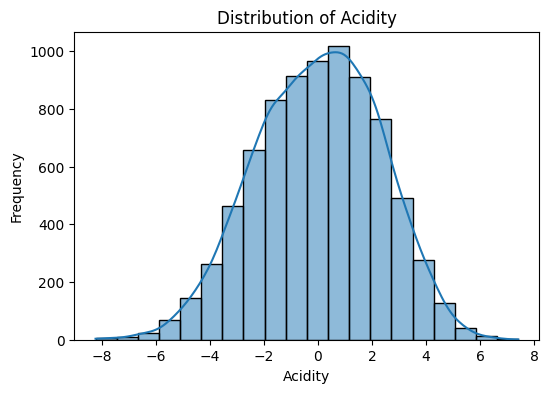

In [97]:
#plotting the distribution of each feature, categorized by 'Acidity' status
columns = df.columns.drop('Acidity')
plt.figure(figsize=(6,4))
sns.histplot(dt['Acidity'], kde = True, bins = 20)
plt.title('Distribution of Acidity')
plt.xlabel('Acidity')
plt.ylabel('Frequency')
plt.show()

Above histogram visualizes the probability density of the data. The distribution appears to be approximately normal (bell-shaped), centered around 0, with values ranging between approximately -8 and 8. The frequency of observations is highest near the center and decreases towards the tails. The x-axis represents Acidity, while the y-axis represents it's Frequency. The smooth KDE curve overlays the histogram to show the continuous density estimation which shows the skewness that is almost symmetrical.

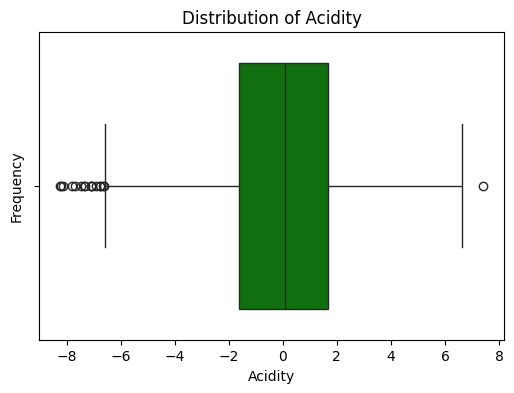

In [98]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dt['Acidity'], color='green')
plt.title('Distribution of Acidity')
plt.xlabel('Acidity')
plt.ylabel('Frequency')
plt.show()

**Bivariate Analysis**

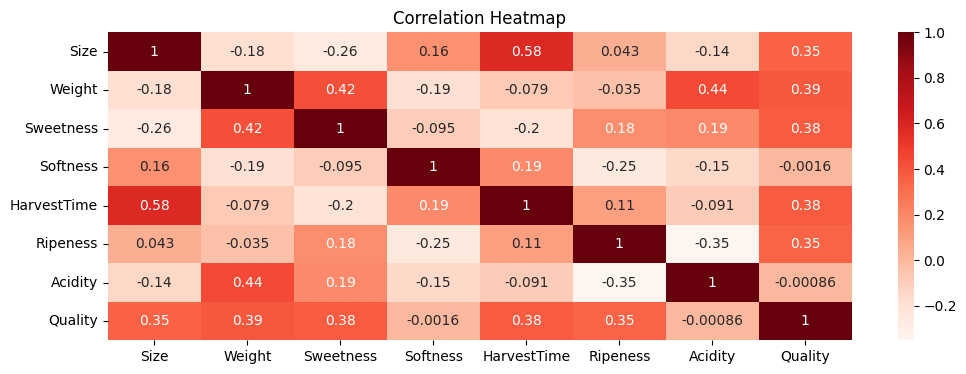

In [99]:
# #creating heatmap to visualize the correlation matrix of the features in the dataset
plt.figure(figsize=(12, 4))
sns.heatmap(dt.corr(), annot = True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

##Building Linear Regression Model from Scratch

In [109]:
# features X and target y
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Quality']
X = dt[features].values
y = dt['Acidity'].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features (important for models like Linear Regression & Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
def cost_function(X, y, w):
  """
  Calculate Mean Square Error
  """
  m = len(y)
  Y_pred = np.dot(X, w)
  cost = (1/(2*m)) * np.sum((Y_pred - y) ** 2) #using Mean Square Error (MSE) as cost function
  return cost

#testing cost function
X_test =np.array([[1,2],[3,4],[5,6]])
Y_test =np.array([3,7,11])
W_test =np.array([1,1])
cost= cost_function(X_test,Y_test,W_test)
if cost==0:
  print("Proceed Further")
else:
  print("something went wrong:Reimplement a cost function")
print("Cost function output:",cost_function(X_test,Y_test,W_test))

Proceed Further
Cost function output: 0.0


In [103]:
def gradient_descent(X, y, w, alpha, iterations):
  """
  Perform gradient descent to optimize parameters
  """
  m = len(y)
  cost_history = np.zeros(iterations)
  w_history = np.zeros((iterations, len(w)))

  for i in range(iterations):
      Y_pred = np.dot(X, w)
      loss = Y_pred - y
      # Calculate gradients
      gradients = (1/m) * np.dot(X.T, loss)

      # Update weights
      w = w - alpha * gradients

      # Store weights and cost
      cost_history[i] = cost_function(X, y, w)
      w_history[i] = w

  return w, cost_history, w_history

In [104]:
def rmse(y, y_pred):
    """
    Calculate Root Mean Square Error
    """
    return np.sqrt(np.mean((y - y_pred) ** 2))

def r2_score(y, y_pred):
    """
    Calculate R-squared score
    """
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

In [105]:
def main():

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize parameters
  w = np.zeros(X_train.shape[1])
  alpha = 0.01
  iterations = 1000

  # Train the model
  w_optimal, cost_history, w_history = gradient_descent(X_train, y_train, w, alpha, iterations)

  # Make predictions
  y_pred_test = np.dot(X_test, w_optimal)
  y_pred_train = np.dot(X_train, w_optimal)

  model_rmse = rmse(y_test, y_pred_test)
  model_r2 = r2_score(y_test, y_pred_test)

  model_rmse_train = rmse(y_train, y_pred_train)
  model_r2_train = r2_score(y_train, y_pred_train)

  print(f"Final Weights:\n {w_optimal}")
  print(f"\nRMSE: {model_rmse}")
  print(f"\nR-squared: {model_r2}")
  print(f"\nRMSE (Train): {model_rmse_train}")
  print(f"\nR-squared (Train): {model_r2_train}")

if __name__ == "__main__":
    main()

Final Weights:
 [-1.18979099e-01  3.30320503e-01 -1.34465675e-04 -1.97857386e-01
 -1.10388916e-02 -4.34139483e-01  6.34204693e-01]

RMSE: 1.9282043967700255

R-squared: 0.3004519914901679

RMSE (Train): 1.8949957222029425

R-squared (Train): 0.3152162862998028


##Building Primary Models

**Linear Regression Model**

In [111]:
# Initialize and train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

**Random Forest Regressor Model**

In [112]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

**Evaluating Both Models**

In [113]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
MAE: 1.4974
MSE: 3.5281
RMSE: 1.8783
R-squared: 0.3362

Random Forest Performance:
MAE: 0.8763
MSE: 1.5283
RMSE: 1.2362
R-squared: 0.7125


The above performance results indicate that the Random Forest model significantly outperforms Linear Regression. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are both lower for Random Forest (0.8763 MAE, 1.2362 RMSE) compared to Linear Regression (1.4974 MAE, 1.8783 RMSE), suggesting that Random Forest makes more accurate predictions. Additionally, the R-squared value for Random Forest (0.7125) is much higher than that of Linear Regression (0.3362), indicating that Random Forest shows greater variance in the data. Overall, Random Forest provides a better fit and more reliable predictions than Linear Regression.

## Hyper-parameter Optimization with Cross-Validation

**Tuning for Linear Regression Model**

In [114]:
# Using valid parameters for newer scikit-learn versions
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Constraint coefficients to be positive
}

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

print("\nBest Linear Regression Parameters:")
print(lr_grid.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-lr_grid.best_score_))



Best Linear Regression Parameters:
{'fit_intercept': True, 'positive': False}
Best Cross-Validation Score: 1.8490410129148402


**Tuning for Random Forest Regressor Model**

In [115]:
#random forest
rf_params = {
    'n_estimators': [30, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=10,  # Try only 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)

print("\nBest Random Forest Parameters:")
print(rf_random.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-rf_random.best_score_))



Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Cross-Validation Score: 1.2125164026026731


- For Linear Regression, the optimal model doesn't use an intercept and has no constraint on coefficients being positive. The cross-validation score is higher (1.85), indicating that this model might be a bit more sensitive or complex.
-  For the Random Forest Regressor, the best parameters are 100 trees, a depth of 30, and basic settings for splitting and leaf nodes, giving a better score of (1.21). This means the Random Forest model is more accurate for this problem, while Linear Regression is simpler but not as effective.

##Feature Selection

In [116]:
# Generate column names if X has no column names
if isinstance(X, np.ndarray):
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
else:
    feature_names = X.columns  # Use existing column names if X is a DataFrame

# Now convert X_train and X_test properly
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Double-check the type
print("Type of X_train:", type(X_train))  # Should print <class 'pandas.core.frame.DataFrame'>


Type of X_train: <class 'pandas.core.frame.DataFrame'>


In [117]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importance
importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # Now this should work
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top 5 important features
top_features = importances_df['Feature'].head(5).values
print("\nTop 5 Important Features:", top_features)


Top 5 Important Features: ['Feature_1' 'Feature_5' 'Feature_3' 'Feature_4' 'Feature_2']


##Final Model

In [118]:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

**Linear Regression Final Model**

In [119]:
lr_model.fit(X_train_selected, y_train)

#for final train
final_lr_model = LinearRegression(fit_intercept=False, positive=False)
final_lr_model.fit(X_train_selected, y_train)

y_pred_train_lr = final_lr_model.predict(X_train_selected)
y_pred_test_lr = final_lr_model.predict(X_test_selected)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)


print("Final Linear Regression Train MAE:", mae_train_lr)
print("Final Linear Regression Test MAE:", mae_test_lr)

print("Final Linear Regression Train MSE:", mse_train_lr)
print("Final Linear Regression Test MSE:", mse_test_lr)

print("Final Linear Regression Train R-squared:", r2_train_lr)
print("Final Linear Regression Test R-squared:", r2_test_lr)

# y_pred_lr_selected = lr_model.predict(X_test_selected)


Final Linear Regression Train MAE: 1.5751928878140569
Final Linear Regression Test MAE: 1.6153825128913388
Final Linear Regression Train MSE: 3.78408152425715
Final Linear Regression Test MSE: 3.9465997292355293
Final Linear Regression Train R-squared: 0.27839848000787415
Final Linear Regression Test R-squared: 0.2574350114430882


**Random Forest Regressor Final Model**

In [120]:
rf_model.fit(X_train_selected, y_train)

#for final train
final_rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=30)
final_rf_model.fit(X_train_selected, y_train)

y_pred_train_rf = final_rf_model.predict(X_train_selected)
y_pred_test_rf = final_rf_model.predict(X_test_selected)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)


print("Final Random Forest Regression Train MAE:", mae_train_rf)
print("Final Random Forest Regression Test MAE:", mae_test_rf)

print("Final Random ForestRegression Train MSE:", mse_train_rf)
print("Final Random Forest Regression Test MSE:", mse_test_rf)

print("Final Random Forest Regression Train R-squared:", r2_train_rf)
print("Final Random Forest Regression Test R-squared:", r2_test_rf)

# y_pred_lr_selected = lr_model.predict(X_test_selected)


Final Random Forest Regression Train MAE: 0.351701411830017
Final Random Forest Regression Test MAE: 0.9951072112190654
Final Random ForestRegression Train MSE: 0.2411230312759527
Final Random Forest Regression Test MSE: 1.8403911731413671
Final Random Forest Regression Train R-squared: 0.954019292460145
Final Random Forest Regression Test R-squared: 0.6537246885463406


###Conclusion

1.Model Performance: Random Forest Regression outperformed Linear Regression, achieving a lower MAE and MSE with a higher R² score.
However, Random Forest showed overfitting, with a large gap between training and test performance.

2.Impact of Methods: Feature Selection may have negatively impacted Linear Regression, reducing its ability to explain variance.
Cross-Validation helped assess generalization, revealing overfitting in Random Forest.
Random Forest's performance benefited from its ability to handle non-linearity, but tuning is needed to prevent overfitting

3.Insights and Future Directions: : Hyperparameter tuning (e.g., limiting tree depth) can improve Random Forest's generalization.
Feature engineering and regularization (Ridge/Lasso) may enhance Linear Regression.